
#**Uber Usage Analysis**
 



<img src="https://raw.githubusercontent.com/nityagudi18/DataSets/master/usage.png"/>                                                                     

<font size="1">Image Source: cleanpng.com</font>



## ***Welcome to my Notebook* :)**


In this notebook I would like to analyze a data set generated from my own Uber account. This data has detailed records of all the rides I have taken with Uber, from the year 2015.

I graduated from school back in 2016 and was living in downtown Seattle.Leasing/Buying a car would just adding to expenses so I usually walked to work and around town and used Uber when required. Now that I am analyzing data sets I thought it would be a good idea to study my Uber data and learn my usage trends, money spent on Uber, distances travelled, regions where I used uber most etc.

#### **How to export data from your Uber account**
1. Login to your Uber account
2. Navigate to <a href="https://help.uber.com/riders/article/request-a-copy-of-your-uber-data?nodeId=2c86900d-8408-4bac-b92a-956d793acd11" target="_top">Request_Uber_Data</a>
3. Scroll down to **Download your data**. You will be redirected to a page where you can hit **Request a copy of your Uber data**
4. The data will be emailed to you in a couple of hours


Lets get started . . .

#### **Importing Libraries and Data**

In [0]:
#Import the required Libraries 
import matplotlib.pyplot as plt  
%matplotlib inline 
import pandas as pd
import seaborn as sns
import missingno as mn
import matplotlib.dates as mdt

#Libraries for Machine Learning
import pydotplus
from scipy.cluster import hierarchy
from sklearn import decomposition,preprocessing,cluster, tree
from  yellowbrick.cluster.silhouette import SilhouetteVisualizer

In [0]:
#Link to raw data on GitHub
url='https://raw.githubusercontent.com/nityagudi18/DataSets/master/trips_data.csv' 

In [0]:
#Reading the csv
df=pd.read_csv(url)

In [0]:
#DataFrame Output
df

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency
0,Pune,UberGo,COMPLETED,2020-03-03 16:34:26 +0000 UTC,2020-03-03 16:38:13 +0000 UTC,18.533223,73.897145,"A1, Aadit Enclave Building, Lane Number 5, S M...",2020-03-03 17:12:27 +0000 UTC,18.499057,73.828043,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",7.01,168.03,INR
1,Pune,UberGo,COMPLETED,2020-03-03 14:06:31 +0000 UTC,2020-03-03 14:11:33 +0000 UTC,18.499143,73.827938,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",2020-03-03 15:36:15 +0000 UTC,18.532893,73.897928,"A1, Aadit Enclave Building, Lane Number 5, S M...",13.31,365.13,INR
2,Pune,UberAuto,COMPLETED,2020-02-27 15:10:34 +0000 UTC,2020-02-27 15:14:25 +0000 UTC,18.519162,73.877116,SGS Mall,2020-02-27 15:42:21 +0000 UTC,18.499078,73.827948,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",5.80,114.90,INR
3,Pune,UberGo,COMPLETED,2020-02-24 04:17:05 +0000 UTC,2020-02-24 04:24:48 +0000 UTC,18.548485,73.790978,"4, Baner - Pashan Link Rd, Pashan, Pune, Mahar...",2020-02-24 05:00:01 +0000 UTC,18.508639,73.854284,"Off, 1326, Bajirao Rd, Natu Baag, Shukrawar Pe...",6.99,327.05,INR
4,Pune,UberGo,COMPLETED,2020-02-14 09:40:03 +0000 UTC,2020-02-14 10:22:46 +0000 UTC,18.499207,73.827999,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",2020-02-14 11:09:03 +0000 UTC,18.578996,73.908357,"New Airport Rd, Pune International Airport Are...",10.69,511.93,INR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,San Francisco,uberX,CANCELED,2015-07-22 20:36:53 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,37.338293,-121.894204,NaN,1970-01-01 00:00:00 +0000 UTC,37.340185,-121.894626,NaN,0.00,0.00,USD
771,San Francisco,uberX,COMPLETED,2015-07-03 04:18:01 +0000 UTC,2015-07-03 04:24:02 +0000 UTC,37.376149,-122.031210,NaN,2015-07-03 04:40:15 +0000 UTC,37.340474,-121.896823,NaN,11.44,22.29,USD
772,San Francisco,uberX,COMPLETED,2015-06-05 16:32:06 +0000 UTC,2015-06-05 16:38:05 +0000 UTC,37.341503,-121.899022,NaN,2015-06-05 16:49:27 +0000 UTC,37.398921,-121.912723,NaN,5.76,13.65,USD
773,San Francisco,uberX,CANCELED,2015-05-13 03:28:06 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.00,0.00,USD


#### **Exploring the Data**

In [0]:
#DataFrame Shape
print("Shape of the data frame:",df.shape)
print("Number of Rows:",len(df))
print("Number of Columns:",len(df.columns))

Shape of the data frame: (775, 15)
Number of Rows: 775
Number of Columns: 15


In [0]:
#Data types
df.dtypes

City                     object
Product Type             object
Trip or Order Status     object
Request Time             object
Begin Trip Time          object
Begin Trip Lat          float64
Begin Trip Lng          float64
Begin Trip Address       object
Dropoff Time             object
Dropoff Lat             float64
Dropoff Lng             float64
Dropoff Address          object
Distance (miles)        float64
Fare Amount             float64
Fare Currency            object
dtype: object

In [0]:
#Summary stats of Numerical data
df.describe()

,Begin Trip Lat,Begin Trip Lng,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount
count,752.000000,752.000000,752.000000,752.000000,775.000000,775.000000
mean,44.615493,-109.931876,44.616685,-109.930113,3.025884,21.216116
std,7.525395,47.436649,7.525851,47.440403,4.109866,60.301443
min,12.935447,-122.419703,12.937514,-122.449600,0.000000,0.000000
25%,47.606137,-122.347337,47.606088,-122.347318,0.700000,4.420000
50%,47.611916,-122.343512,47.612012,-122.343182,1.190000,6.590000
75%,47.614666,-122.326169,47.615163,-122.320680,4.180000,14.205000
max,47.716740,77.619469,47.809930,77.710373,23.310000,736.760000


In [0]:
#List of Cities I used uber
print(" Cities:\n",df.City.unique())
print("\nValue counts for these Cities:\n",df.City.value_counts())

 Cities:
 ['Pune' 'Delhi NCR' 'Udaipur' 'Seattle' 'Croatian Coast' 'Munich'
 'Bangalore' 'San Francisco' 'Los Angeles']

Value counts for these Cities:
 Seattle           627
San Francisco      89
Pune               39
Bangalore          10
Croatian Coast      3
Udaipur             3
Los Angeles         2
Delhi NCR           1
Munich              1
Name: City, dtype: int64


In [0]:
# Missing Data
df.isna()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
771,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
772,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
773,False,False,False,False,False,True,True,True,False,True,True,True,False,False,False


In [0]:
#Count of missing data per column
df.isna().sum()

City                      0
Product Type              4
Trip or Order Status      0
Request Time              0
Begin Trip Time           0
Begin Trip Lat           23
Begin Trip Lng           23
Begin Trip Address      205
Dropoff Time              0
Dropoff Lat              23
Dropoff Lng              23
Dropoff Address         160
Distance (miles)          0
Fare Amount               0
Fare Currency             2
dtype: int64

In [0]:
# % of missing data
((df
  .isna()
  .mean() 
  * 100)
  .pipe(lambda ser : ser[ser > 0]))

Product Type           0.516129
Begin Trip Lat         2.967742
Begin Trip Lng         2.967742
Begin Trip Address    26.451613
Dropoff Lat            2.967742
Dropoff Lng            2.967742
Dropoff Address       20.645161
Fare Currency          0.258065
dtype: float64

In [0]:
#City,Product Type and order statuses of rides missing start Addresss
df.loc[df['Begin Trip Address'].isna(),['City','Product Type','Trip or Order Status']]

,City,Product Type,Trip or Order Status
5,Pune,UberGo,CANCELED
6,Pune,NaN,UNFULFILLED
7,Pune,UberAuto,CANCELED
9,Pune,UberAuto,CANCELED
10,Pune,UberGo,CANCELED
...,...,...,...
770,San Francisco,uberX,CANCELED
771,San Francisco,uberX,COMPLETED
772,San Francisco,uberX,COMPLETED
773,San Francisco,uberX,CANCELED


In [0]:
#Categorial data
df.select_dtypes(include=[object]).dtypes

City                    object
Product Type            object
Trip or Order Status    object
Request Time            object
Begin Trip Time         object
Begin Trip Address      object
Dropoff Time            object
Dropoff Address         object
Fare Currency           object
dtype: object

In [0]:
df['Product Type'].value_counts(dropna=False)

uberX                     218
UberX                     171
UberEATS Marketplace       98
uberPOOL                   65
uberX ESB                  54
UberGo                     42
uberPOOL: MATCHED          40
Pool                       11
Express Pool: MATCHED      10
Pool: MATCHED               9
UberEATS                    9
uberXL                      9
UberAuto                    8
UberXL                      8
POOL: MATCHED               6
NaN                         4
uberx                       3
POOL                        3
Express Pool                3
UberEATS - Marketplace      2
SELECT                      1
SUV                         1
Name: Product Type, dtype: int64

In [0]:
df['Trip or Order Status'].value_counts(dropna=False)

COMPLETED          685
CANCELED            76
DRIVER_CANCELED      9
UNFULFILLED          4
FAILED               1
Name: Trip or Order Status, dtype: int64

In [0]:
df['Fare Currency'].value_counts(dropna=False)

USD    716
INR     53
HRK      3
NaN      2
EUR      1
Name: Fare Currency, dtype: int64

In [0]:
df['Distance (miles)'].agg(['min','mean','max'])

min      0.000000
mean     3.025884
max     23.310000
Name: Distance (miles), dtype: float64

In [0]:
#Lets Correlate
df['Distance (miles)'].corr(df['Fare Amount'])

0.34275972690544376

In [0]:
Dummies1=pd.get_dummies(df['City'])
frames=[df,Dummies1]
result=pd.concat(frames,axis=1)
result

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Begin Trip Address,Dropoff Time,Dropoff Lat,Dropoff Lng,Dropoff Address,Distance (miles),Fare Amount,Fare Currency,Bangalore,Croatian Coast,Delhi NCR,Los Angeles,Munich,Pune,San Francisco,Seattle,Udaipur
0,Pune,UberGo,COMPLETED,2020-03-03 16:34:26 +0000 UTC,2020-03-03 16:38:13 +0000 UTC,18.533223,73.897145,"A1, Aadit Enclave Building, Lane Number 5, S M...",2020-03-03 17:12:27 +0000 UTC,18.499057,73.828043,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",7.01,168.03,INR,0,0,0,0,0,1,0,0,0
1,Pune,UberGo,COMPLETED,2020-03-03 14:06:31 +0000 UTC,2020-03-03 14:11:33 +0000 UTC,18.499143,73.827938,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",2020-03-03 15:36:15 +0000 UTC,18.532893,73.897928,"A1, Aadit Enclave Building, Lane Number 5, S M...",13.31,365.13,INR,0,0,0,0,0,1,0,0,0
2,Pune,UberAuto,COMPLETED,2020-02-27 15:10:34 +0000 UTC,2020-02-27 15:14:25 +0000 UTC,18.519162,73.877116,SGS Mall,2020-02-27 15:42:21 +0000 UTC,18.499078,73.827948,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",5.80,114.90,INR,0,0,0,0,0,1,0,0,0
3,Pune,UberGo,COMPLETED,2020-02-24 04:17:05 +0000 UTC,2020-02-24 04:24:48 +0000 UTC,18.548485,73.790978,"4, Baner - Pashan Link Rd, Pashan, Pune, Mahar...",2020-02-24 05:00:01 +0000 UTC,18.508639,73.854284,"Off, 1326, Bajirao Rd, Natu Baag, Shukrawar Pe...",6.99,327.05,INR,0,0,0,0,0,1,0,0,0
4,Pune,UberGo,COMPLETED,2020-02-14 09:40:03 +0000 UTC,2020-02-14 10:22:46 +0000 UTC,18.499207,73.827999,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",2020-02-14 11:09:03 +0000 UTC,18.578996,73.908357,"New Airport Rd, Pune International Airport Are...",10.69,511.93,INR,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,San Francisco,uberX,CANCELED,2015-07-22 20:36:53 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,37.338293,-121.894204,NaN,1970-01-01 00:00:00 +0000 UTC,37.340185,-121.894626,NaN,0.00,0.00,USD,0,0,0,0,0,0,1,0,0
771,San Francisco,uberX,COMPLETED,2015-07-03 04:18:01 +0000 UTC,2015-07-03 04:24:02 +0000 UTC,37.376149,-122.031210,NaN,2015-07-03 04:40:15 +0000 UTC,37.340474,-121.896823,NaN,11.44,22.29,USD,0,0,0,0,0,0,1,0,0
772,San Francisco,uberX,COMPLETED,2015-06-05 16:32:06 +0000 UTC,2015-06-05 16:38:05 +0000 UTC,37.341503,-121.899022,NaN,2015-06-05 16:49:27 +0000 UTC,37.398921,-121.912723,NaN,5.76,13.65,USD,0,0,0,0,0,0,1,0,0
773,San Francisco,uberX,CANCELED,2015-05-13 03:28:06 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,NaN,0.00,0.00,USD,0,0,0,0,0,0,1,0,0


#### **Data Cleanup**


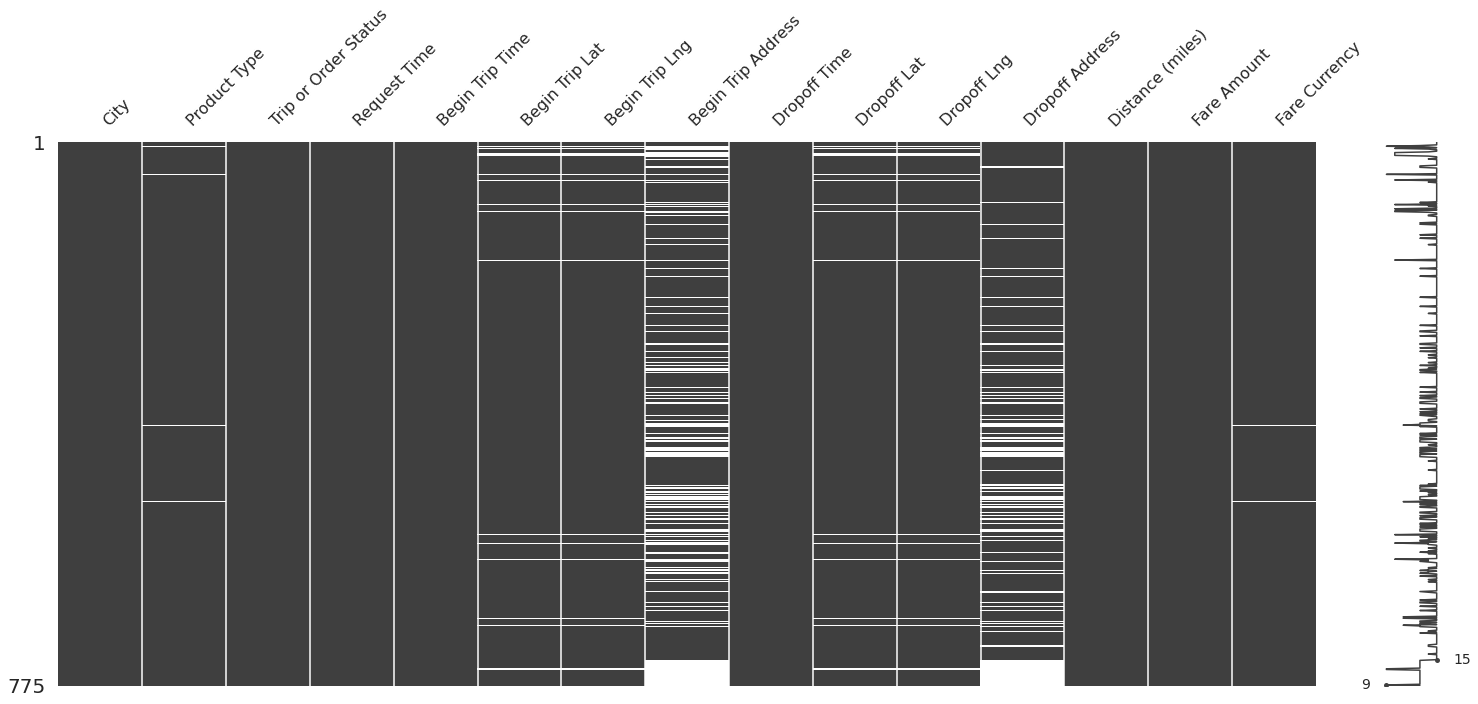

In [0]:
#Visualizing missing values. The White spaces indicate NaN values(not a number/missing) in each column
mn.matrix(df)

The 'Nan' data can either be dropped, filled with a dummy value or interpolated

In [0]:
#Let drop the missing values and replot 
df1=df.dropna(axis=0,how='any') #any=Drop the entire row if there is even a single missing value

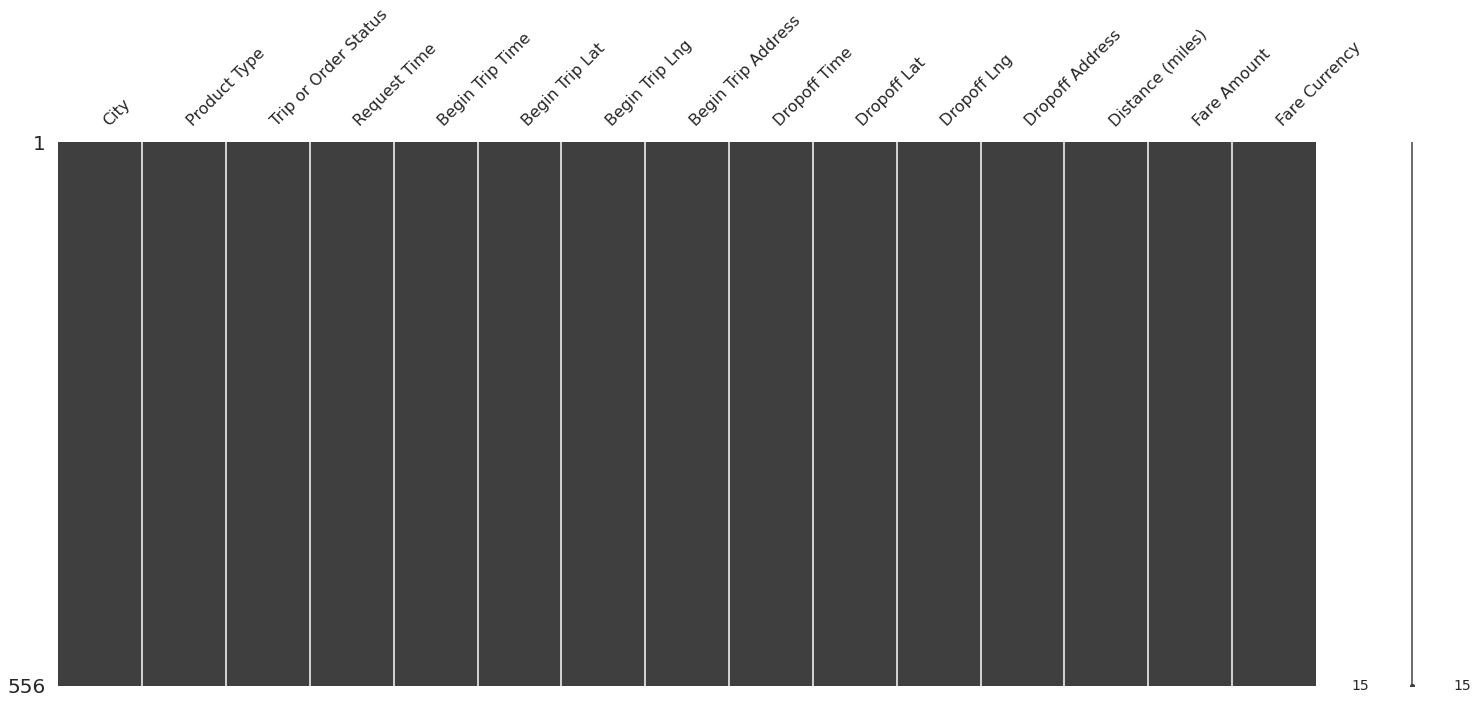

In [0]:
mn.matrix(df1) #We can now see all rows with any missing vales are dropped

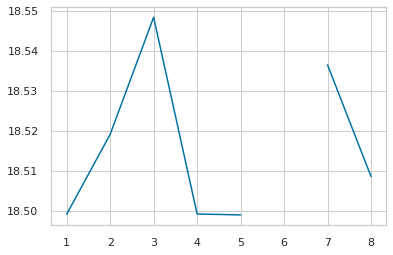

In [0]:
#Plot with missing values
df['Begin Trip Lat'].iloc[1:10].plot()

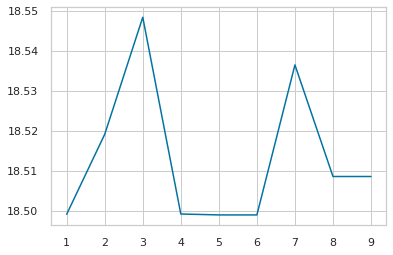

In [0]:
#Example of a forward fill 
df['Begin Trip Lat'].iloc[1:10].ffill().plot()

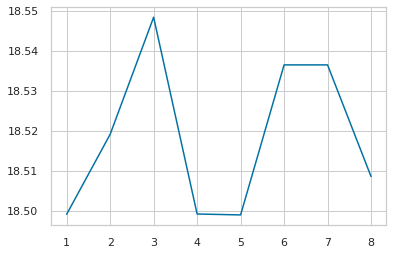

In [0]:
#Example of back fill
df['Begin Trip Lat'].iloc[1:10].bfill().plot()

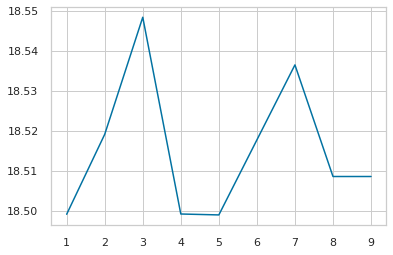

In [0]:
#Example of Interpolating the missing data
df['Begin Trip Lat'].iloc[1:10].interpolate().plot()

In [0]:
#Clean Column names
df1.columns=[c.replace(' ','_') for c in df1.columns]
df1

,City,Product_Type,Trip_or_Order_Status,Request_Time,Begin_Trip_Time,Begin_Trip_Lat,Begin_Trip_Lng,Begin_Trip_Address,Dropoff_Time,Dropoff_Lat,Dropoff_Lng,Dropoff_Address,Distance_(miles),Fare_Amount,Fare_Currency
0,Pune,UberGo,COMPLETED,2020-03-03 16:34:26 +0000 UTC,2020-03-03 16:38:13 +0000 UTC,18.533223,73.897145,"A1, Aadit Enclave Building, Lane Number 5, S M...",2020-03-03 17:12:27 +0000 UTC,18.499057,73.828043,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",7.01,168.03,INR
1,Pune,UberGo,COMPLETED,2020-03-03 14:06:31 +0000 UTC,2020-03-03 14:11:33 +0000 UTC,18.499143,73.827938,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",2020-03-03 15:36:15 +0000 UTC,18.532893,73.897928,"A1, Aadit Enclave Building, Lane Number 5, S M...",13.31,365.13,INR
2,Pune,UberAuto,COMPLETED,2020-02-27 15:10:34 +0000 UTC,2020-02-27 15:14:25 +0000 UTC,18.519162,73.877116,SGS Mall,2020-02-27 15:42:21 +0000 UTC,18.499078,73.827948,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",5.80,114.90,INR
3,Pune,UberGo,COMPLETED,2020-02-24 04:17:05 +0000 UTC,2020-02-24 04:24:48 +0000 UTC,18.548485,73.790978,"4, Baner - Pashan Link Rd, Pashan, Pune, Mahar...",2020-02-24 05:00:01 +0000 UTC,18.508639,73.854284,"Off, 1326, Bajirao Rd, Natu Baag, Shukrawar Pe...",6.99,327.05,INR
4,Pune,UberGo,COMPLETED,2020-02-14 09:40:03 +0000 UTC,2020-02-14 10:22:46 +0000 UTC,18.499207,73.827999,"Plot No. 1, Shop No. 16/ 6, Erandwane C. H. S,...",2020-02-14 11:09:03 +0000 UTC,18.578996,73.908357,"New Airport Rd, Pune International Airport Are...",10.69,511.93,INR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,San Francisco,uberX ESB,COMPLETED,2016-03-04 05:58:00 +0000 UTC,2016-03-04 06:06:23 +0000 UTC,37.332647,-121.912639,"1300 The Alameda, San Jose, CA 95126, USA",2016-03-04 06:13:35 +0000 UTC,37.348072,-121.899139,"644 N 1st St, San Jose, CA 95112, United States",1.95,5.78,USD
734,San Francisco,uberX ESB,COMPLETED,2016-02-28 04:19:54 +0000 UTC,2016-02-28 04:32:08 +0000 UTC,37.413481,-121.896941,"604 Great Mall Dr, Milpitas, CA 95035, USA",2016-02-28 04:49:12 +0000 UTC,37.376919,-122.030149,"141 S Murphy Ave, Sunnyvale, CA 94086, USA",10.44,14.48,USD
735,San Francisco,uberX,COMPLETED,2016-02-08 00:22:30 +0000 UTC,2016-02-08 00:32:10 +0000 UTC,37.432566,-121.899508,"455 E Calaveras Blvd, Milpitas, CA 95035, Unit...",2016-02-08 00:36:49 +0000 UTC,37.423708,-121.905119,"440 S Main St, Milpitas, CA 95035, United States",1.36,5.35,USD
736,San Francisco,uberX,CANCELED,2016-02-08 00:21:08 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,37.459472,-121.912327,"455 E Calaveras Blvd, Milpitas, CA 95035, Unit...",1970-01-01 00:00:00 +0000 UTC,37.459472,-121.912327,"440 S Main St, Milpitas, CA 95035, United States",0.00,0.00,USD


In [0]:
#Exploring the Product type
df['Product Type'].value_counts()

uberX                     218
UberX                     171
UberEATS Marketplace       98
uberPOOL                   65
uberX ESB                  54
UberGo                     42
uberPOOL: MATCHED          40
Pool                       11
Express Pool: MATCHED      10
uberXL                      9
Pool: MATCHED               9
UberEATS                    9
UberAuto                    8
UberXL                      8
POOL: MATCHED               6
POOL                        3
Express Pool                3
uberx                       3
UberEATS - Marketplace      2
SELECT                      1
SUV                         1
Name: Product Type, dtype: int64

From the cell results above it is observed that some of the product types are the same but are categorized due to font differences. Let us clean this up

<img src="https://raw.githubusercontent.com/nityagudi18/DataSets/master/product.PNG"/>


In [0]:
#Cleaning the Product type
df['Product Type'].replace({'Express Pool: MATCHED':'Express Pool','POOL: MATCHED':'uberPOOL','Pool: MATCHED':'uberPOOL','POOL':'uberPOOL','Pool':'uberPOOL','uberX':'UberX','uberx':'UberX','uberPOOL: MATCHED':'uberPOOL','uberXL':'UberXL','UberEATS - Marketplace':'UberEATS','UberEATS Marketplace':'UberEATS'}).value_counts(dropna=False)

UberX           392
uberPOOL        134
UberEATS        109
uberX ESB        54
UberGo           42
UberXL           17
Express Pool     13
UberAuto          8
NaN               4
SUV               1
SELECT            1
Name: Product Type, dtype: int64

In [0]:
Product=df['Product Type'].replace({'Express Pool: MATCHED':'Express Pool','POOL: MATCHED':'uberPOOL','Pool: MATCHED':'uberPOOL','POOL':'uberPOOL','Pool':'uberPOOL','uberX':'UberX','uberx':'UberX','uberPOOL: MATCHED':'uberPOOL','uberXL':'UberXL','UberEATS - Marketplace':'UberEATS','UberEATS Marketplace':'UberEATS'}).dropna()

In [0]:
#Add the clean product type to the dataframe
df1=df1.assign(Product=Product)

The City column has cities from different countries, so lets create a column Country by mapping the cities to their respective countries to categorize them easily to compare parameters that change region wise (example: Fare,Currency,Product Type)



In [0]:
#Map cities to respective countries 
country=df.City.replace({'Pune':'India','Bangalore':'India','Udaipur':'India','Delhi NCR':'India','Seattle':'US','San Francisco':'US','Los Angeles':'US','Croatian Coast':'Croatia','Munich':'Germany'})

In [0]:
#Add the country column to the DataFrame
df1=df1.assign(Country=country)


In [0]:
df1.Country.value_counts()

US         515
India       38
Croatia      3
Name: Country, dtype: int64

In [0]:
#Lets add a year column
year=df['Request Time'].str.slice(0,4).astype(int).rename('Year').dropna()
df1=df1.assign(Year=year)

#####**Function To clean data**
All the above cleaning done on the data can be written as a single function as below

In [0]:
def clean_data(data):
    # Cleaning missing data 
    df2=df.dropna(axis=0,how='all').fillna("Unknown")
    df2.columns=[c.replace(' ','_') for c in df2.columns]
    
    # Cleaning Product mapping
    q1=(df2['Product_Type'].replace({'Express Pool: MATCHED':'Express Pool','POOL: MATCHED':'uberPOOL','Pool: MATCHED':'uberPOOL','POOL':'uberPOOL','Pool':'uberPOOL','uberX':'UberX','uberx':'UberX','uberPOOL: MATCHED':'uberPOOL','uberXL':'UberXL','UberEATS - Marketplace':'UberEATS','UberEATS Marketplace':'UberEATS'})
        .fillna("Unknown")
        .rename("Product")
        )
    # Map Cities to Country
    q2=(df2.City.replace({'Pune':'India','Bangalore':'India','Udaipur':'India','Delhi NCR':'India','Seattle':'US','San Francisco':'US','Los Angeles':'US','Croatian Coast':'Croatia','Munich':'Germany'})
        .fillna("Unknown")
        .rename("Country")
    )

    # Extract Year
    q3=(df2['Request_Time'].str.slice(0,4).astype(int).rename('Year')
    .fillna("Not Recorded")
    .rename("Year")
    )
    #Extract Date
    q4=(df2['Request_Time'].str[0:10]
        .fillna("Not Recorded")
        .rename("Date")
    )
    #Extract Start Time of the ride
    q5=(df2['Request_Time'].str[11:19]
        .fillna("Not Recorded")
        .rename("Start_Time")
        )
    #Extract End Time of the ride
    q6=(df2['Dropoff_Time'].str[11:19]
        .fillna("Not Recorded")
        .rename("End_Time")
        )
    
    return pd.concat([df2.City,df2.Trip_or_Order_Status,df2.iloc[:,12::],q1, q2, q3,q4,q5,q6], axis=1)

clean_d=clean_data(df)
clean_d.Start_Time=pd.to_datetime(clean_d.Start_Time)
clean_d.End_Time=pd.to_datetime(clean_d.End_Time)

duration=clean_d.End_Time.sub(clean_d.Start_Time).fillna("NotRecorded") # Duration of the ride = EndTime - StartTime
clean_d=clean_d.assign(Trip_Duration=duration)
TimeOfDay= clean_d.Start_Time.apply(lambda x:'night'  if int(x.strftime('%H')) >18 else 'day') #Day or Night
clean_d=clean_d.assign(TimeOfDay=TimeOfDay)


##### **Function to prepare data for MachineLearning**


In [0]:
#Convert all catogorial code to numeric
def prep_ml(data):
    mdf=df.drop(['Trip or Order Status','Request Time','Begin Trip Time','Dropoff Time','Begin Trip Lat','Begin Trip Lng','Begin Trip Address','Dropoff Lat','Dropoff Lng','Dropoff Address'],axis=1)
    mdf['Product Type']=mdf['Product Type'].replace({'Express Pool: MATCHED':'Express Pool','POOL: MATCHED':'uberPOOL','Pool: MATCHED':'uberPOOL','POOL':'uberPOOL','Pool':'uberPOOL','uberX':'UberX','uberx':'UberX','uberPOOL: MATCHED':'uberPOOL','uberXL':'UberXL','UberEATS - Marketplace':'UberEATS','UberEATS Marketplace':'UberEATS'}).dropna()
    country=mdf.City.replace({'Pune':'India','Bangalore':'India','Udaipur':'India','Delhi NCR':'India','Seattle':'US','San Francisco':'US','Los Angeles':'US','Croatian Coast':'Croatia','Munich':'Germany'}).dropna()
    mdf=mdf.assign(Country=country)
    year=df['Request Time'].str.slice(0,4).astype(int)
    mdf=mdf.assign(Year=year)
    mdf=mdf.dropna(axis=0,how='any')
    mdf=pd.get_dummies(mdf,drop_first=True)
    cols=[c.replace(" ","_") for c in mdf.columns]
    mdf.columns=cols
    return mdf


ml_data=prep_ml(df)

#### **Analysis with basic Plots**

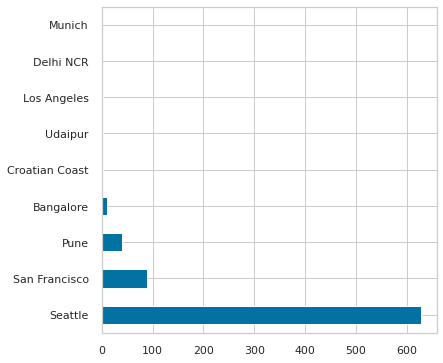

In [0]:
#Plotting number of rides taken in every city
clean_d.City.value_counts().plot(kind="barh",figsize=(6,6))

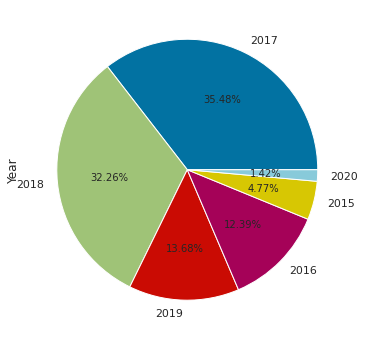

In [0]:
#Pie Chart of Number of Rides taken with respect to the Years
clean_d.Year.value_counts().plot.pie(figsize=(6,6),autopct='%1.2f%%')

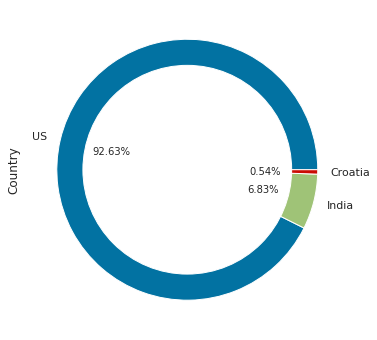

In [0]:
#Donut plot of Number of Rides in each country
df1.Country.value_counts().plot(kind='pie',figsize=(6,6),autopct='%1.2f%%')
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

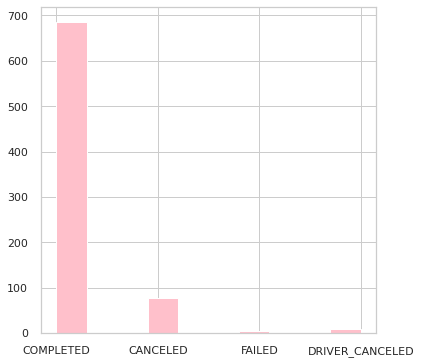

In [0]:
# Histogram of Order Status
clean_d.Trip_or_Order_Status.replace({'UNFULFILLED':'FAILED'}).hist(figsize=(6,6),fc="Pink")

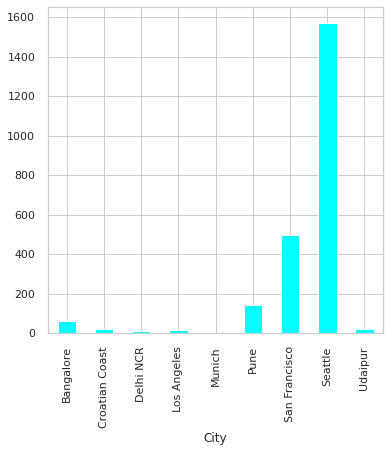

In [0]:
#Now lets visualize Total miles travelled in each city
clean_d['Distance_(miles)'].groupby(df.City).sum().plot(kind='bar',figsize=(6,6),fc="cyan")

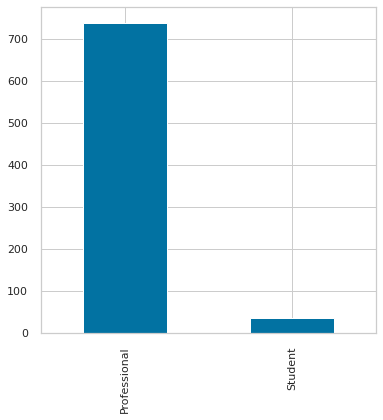

In [0]:
#Uber Usage/Rides in Student life Vs Professional Life

def status(val):
  if val < 2016:
    return 'Student'
  else:
    return 'Professional'

Stu_Prof=clean_d.Year.apply(status)
clean_d=clean_d.assign(Status=Stu_Prof)
Stu_Prof.value_counts().plot(kind='bar',figsize=(6,6))


####**Analysis with Visualization techniques** 

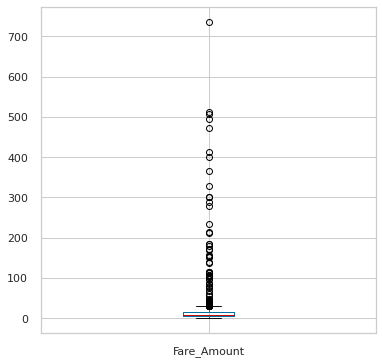

In [0]:
#Visualizing Outliers with respect to Fare Amount
clean_d.Fare_Amount.plot.box(figsize=(6,6))

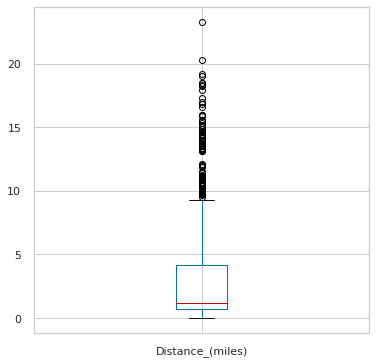

In [0]:
#Visualizing Outliers with respect to Distance
clean_d['Distance_(miles)'].plot.box(figsize=(6,6))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


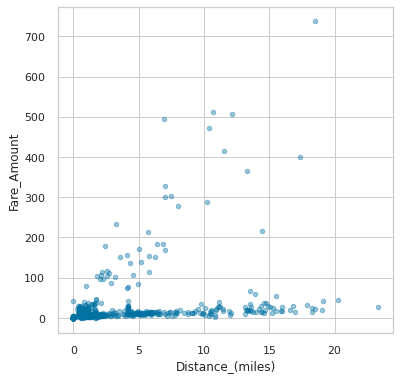

In [0]:
#Distance vs Fare
clean_d.plot.scatter(x='Distance_(miles)',y='Fare_Amount',alpha=.4,figsize=(6,6))

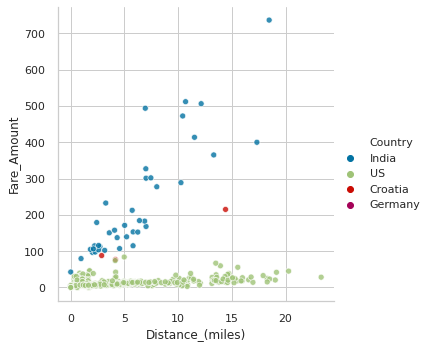

In [0]:
#Distance Vs Fare per Country
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.relplot(x='Distance_(miles)',y='Fare_Amount',data=clean_d,hue='Country',alpha=.8)

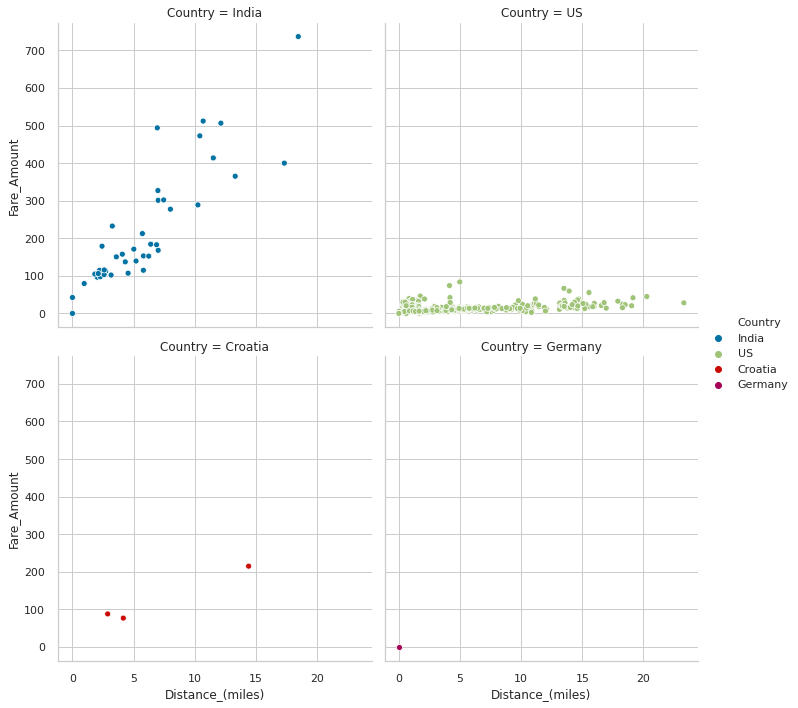

In [0]:
#The above scatter plot modified to have independent plot per country
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.relplot(x='Distance_(miles)',y='Fare_Amount',data=clean_d,hue='Country',col='Country',col_wrap=2)

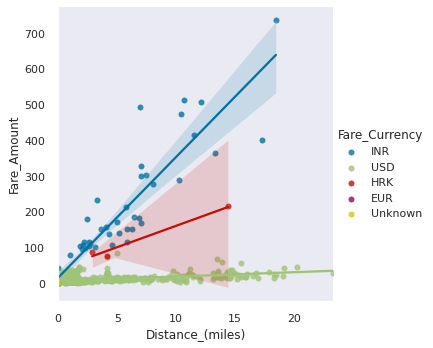

In [0]:
#Regression plot 
with sns.axes_style('dark'):
    sns.set_context("notebook")
    sns.lmplot(x='Distance_(miles)',y='Fare_Amount',data=clean_d,hue='Fare_Currency')

In [0]:
#Correlation of distance and fare
clean_d['Distance_(miles)'].corr(clean_d['Fare_Amount'])

0.34275972690544376

In [0]:
#Correlation of Fare and start location
df['Fare Amount'].corr(df['Begin Trip Lng'])

0.7393452410674218

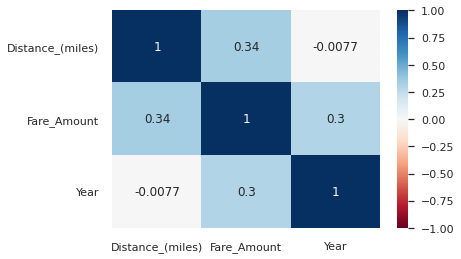

In [0]:
#Visualizing Correlation
with sns.plotting_context('notebook'):
    sns.heatmap(clean_d.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

In [0]:
#Pivot table with Country and mean amount spent per country 
pd.pivot_table(clean_d,values='Fare_Amount',index='Country',aggfunc='mean')

,Fare_Amount
Country,
Croatia,126.570000
Germany,0.000000
India,168.211887
US,9.954805


In [0]:
#Cross Table of maximum amount spent in each currency
pd.crosstab(clean_d.Country,clean_d['Fare_Currency'],values=clean_d.Fare_Amount,aggfunc=max).fillna("-") 

Fare_Currency,EUR,HRK,INR,USD,Unknown
Country,,,,,
Croatia,-,215,-,-,-
Germany,0,-,-,-,-
India,-,-,736.76,-,-
US,-,-,-,83.83,0


In [0]:
# Total Amount Spent in each  country 
pd.crosstab(clean_d.Country,clean_d['Fare_Currency'],values=clean_d.Fare_Amount,aggfunc=sum).fillna("-") 

Fare_Currency,EUR,HRK,INR,USD,Unknown
Country,,,,,
Croatia,-,379.71,-,-,-
Germany,0,-,-,-,-
India,-,-,8915.23,-,-
US,-,-,-,7147.55,0


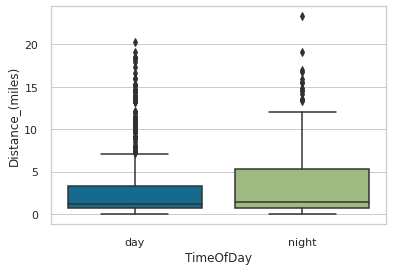

In [0]:
#Time of the day most miles were driven
with sns.plotting_context('notebook'):
  sns.set_style("whitegrid")
  sns.boxplot(x='TimeOfDay', y='Distance_(miles)', data=clean_d)

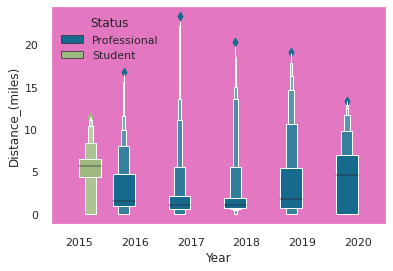

In [0]:
#Uber usage in student life and professional
with sns.plotting_context('notebook'):
  with sns.axes_style('dark', {'axes.facecolor':'#e377c2'}):
    sns.boxenplot(x='Year', y='Distance_(miles)', data=clean_d,hue='Status')

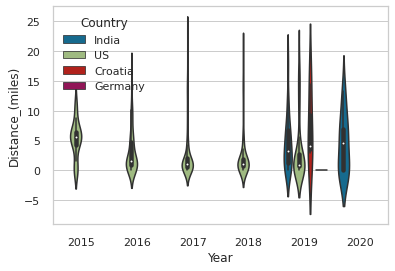

In [0]:
#Plotting Distance covered in a country per year
with sns.plotting_context('notebook'):
  sns.violinplot(x='Year', y='Distance_(miles)', data=clean_d,hue='Country')

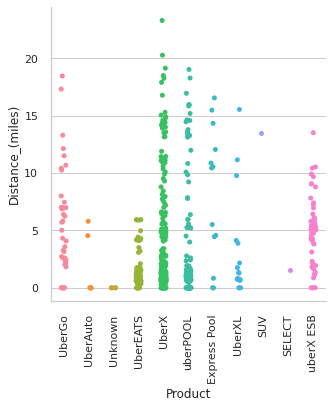

In [0]:
#Cat plot of Product type vs Country
with sns.plotting_context('notebook'):
  ax=sns.catplot(x='Product', y='Distance_(miles)', data=clean_d)
  ax.set_xticklabels(rotation=90)

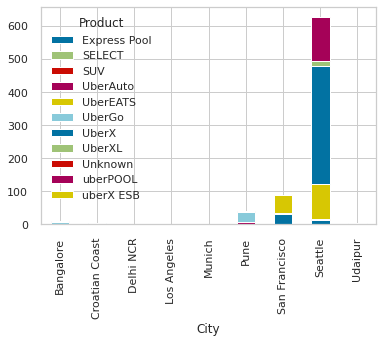

In [0]:
#Product usage stacked per City
(clean_d
 .pipe(lambda df2: pd.crosstab(clean_d.City, clean_d.Product))
 .plot.bar(stacked=True)
)

In [0]:
#Weekly log of distances covered and amount
clean_d["Date"]=pd.to_datetime(clean_d["Date"])
weekly = (clean_d
         .set_index("Date")
         .resample('w')
         .agg({'City':'first','Distance_(miles)':'max','Fare_Amount':'max'})
        ).fillna("-")
weekly

,City,Distance_(miles),Fare_Amount
Date,,,
2015-05-10,San Francisco,6.22,14.43
2015-05-17,San Francisco,0,0
2015-05-24,-,-,-
2015-05-31,-,-,-
2015-06-07,San Francisco,5.76,13.65
...,...,...,...
2020-02-09,-,-,-
2020-02-16,Pune,10.69,511.93
2020-02-23,-,-,-


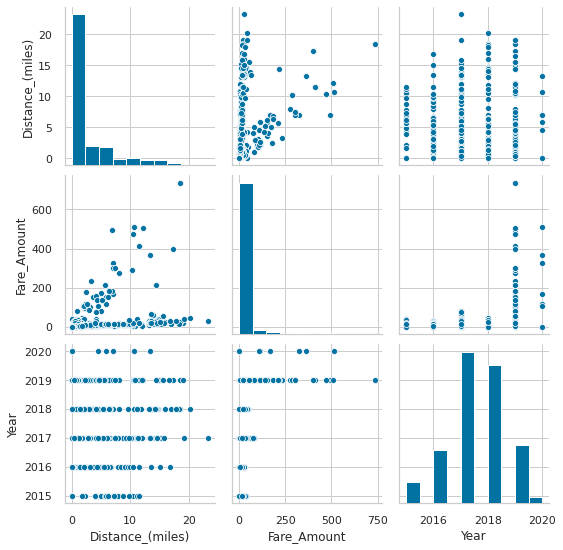

In [0]:
sns.pairplot(clean_d)

####**Machine Learning**

In [0]:
ml_data

,Distance_(miles),Fare_Amount,Year,City_Croatian_Coast,City_Delhi_NCR,City_Los_Angeles,City_Pune,City_San_Francisco,City_Seattle,City_Udaipur,Product_Type_SELECT,Product_Type_SUV,Product_Type_UberAuto,Product_Type_UberEATS,Product_Type_UberGo,Product_Type_UberX,Product_Type_UberXL,Product_Type_uberPOOL,Product_Type_uberX_ESB,Fare_Currency_INR,Fare_Currency_USD,Country_India,Country_US
0,7.01,168.03,2020,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,13.31,365.13,2020,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,5.80,114.90,2020,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,6.99,327.05,2020,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,10.69,511.93,2020,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0.00,0.00,2015,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
771,11.44,22.29,2015,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
772,5.76,13.65,2015,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
773,0.00,0.00,2015,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [0]:
#Creating a scalar
X = ml_data
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std

,Distance_(miles),Fare_Amount,Year,City_Croatian_Coast,City_Delhi_NCR,City_Los_Angeles,City_Pune,City_San_Francisco,City_Seattle,City_Udaipur,Product_Type_SELECT,Product_Type_SUV,Product_Type_UberAuto,Product_Type_UberEATS,Product_Type_UberGo,Product_Type_UberX,Product_Type_UberXL,Product_Type_uberPOOL,Product_Type_uberX_ESB,Fare_Currency_INR,Fare_Currency_USD,Country_India,Country_US
0,0.965070,2.428903,2.431783,-0.0625,-0.036037,-0.050998,4.391978,-0.361246,-2.069015,-0.0625,-0.036037,-0.036037,-0.102396,-0.405774,4.166190,-1.017006,-0.150155,-0.458651,-0.274434,3.718457,-3.608072,3.718457,-3.608072
1,2.497152,5.692190,2.431783,-0.0625,-0.036037,-0.050998,4.391978,-0.361246,-2.069015,-0.0625,-0.036037,-0.036037,-0.102396,-0.405774,4.166190,-1.017006,-0.150155,-0.458651,-0.274434,3.718457,-3.608072,3.718457,-3.608072
2,0.670813,1.549255,2.431783,-0.0625,-0.036037,-0.050998,4.391978,-0.361246,-2.069015,-0.0625,-0.036037,-0.036037,9.766012,-0.405774,-0.240027,-1.017006,-0.150155,-0.458651,-0.274434,3.718457,-3.608072,3.718457,-3.608072
3,0.960206,5.061718,2.431783,-0.0625,-0.036037,-0.050998,4.391978,-0.361246,-2.069015,-0.0625,-0.036037,-0.036037,-0.102396,-0.405774,4.166190,-1.017006,-0.150155,-0.458651,-0.274434,3.718457,-3.608072,3.718457,-3.608072
4,1.860000,8.122685,2.431783,-0.0625,-0.036037,-0.050998,4.391978,-0.361246,-2.069015,-0.0625,-0.036037,-0.036037,-0.102396,-0.405774,4.166190,-1.017006,-0.150155,-0.458651,-0.274434,3.718457,-3.608072,3.718457,-3.608072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,-0.739675,-0.353087,-2.271942,-0.0625,-0.036037,-0.050998,-0.227688,2.768198,-2.069015,-0.0625,-0.036037,-0.036037,-0.102396,-0.405774,-0.240027,0.983279,-0.150155,-0.458651,-0.274434,-0.268929,0.277156,-0.268929,0.277156
767,2.042391,0.015957,-2.271942,-0.0625,-0.036037,-0.050998,-0.227688,2.768198,-2.069015,-0.0625,-0.036037,-0.036037,-0.102396,-0.405774,-0.240027,0.983279,-0.150155,-0.458651,-0.274434,-0.268929,0.277156,-0.268929,0.277156
768,0.661085,-0.127091,-2.271942,-0.0625,-0.036037,-0.050998,-0.227688,2.768198,-2.069015,-0.0625,-0.036037,-0.036037,-0.102396,-0.405774,-0.240027,0.983279,-0.150155,-0.458651,-0.274434,-0.268929,0.277156,-0.268929,0.277156
769,-0.739675,-0.353087,-2.271942,-0.0625,-0.036037,-0.050998,-0.227688,2.768198,-2.069015,-0.0625,-0.036037,-0.036037,-0.102396,-0.405774,-0.240027,0.983279,-0.150155,-0.458651,-0.274434,-0.268929,0.277156,-0.268929,0.277156


In [0]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(len(X.columns))])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,10.142156,-0.432901,0.013040,0.155717,0.024984,-0.451826,0.202614,0.137772,0.089314,0.070050,0.001805,-2.060302,0.139079,-0.694156,-0.810067,-0.288630,-0.423445,0.069192,-0.045999,-5.462809e-15,2.812987e-14,-7.052852e-15,-3.597960e-16
1,11.153092,-0.118342,0.142794,2.074664,0.212698,-0.147732,0.532368,0.458603,0.248017,0.038208,-0.005035,-2.555586,-1.312924,0.012515,1.157436,0.170655,-1.347994,0.184929,0.039816,5.687306e-14,-1.004376e-16,-1.200665e-15,-4.740235e-17
2,9.669685,-0.693429,-0.088545,-6.348478,-2.458309,1.968480,1.652560,1.677699,0.389917,-0.018052,0.004951,3.973158,-3.816990,0.534425,1.300965,0.154587,-0.912933,0.084065,0.008044,-3.940198e-17,-3.086142e-15,2.109892e-15,2.769099e-15
3,10.875648,-0.401172,0.008788,1.121652,0.402103,-0.360279,0.261295,0.210364,0.263911,-0.003914,0.002992,-2.355724,-0.152236,-0.138695,1.093341,0.359651,-1.275686,0.130469,0.056153,-3.741196e-15,-1.862794e-15,2.502443e-16,-2.910949e-16
4,11.788346,-0.202261,0.083330,2.669517,0.675889,-0.141628,0.480821,0.430660,0.432933,-0.054684,-0.000520,-2.775196,-1.133128,0.517807,3.075693,0.910712,-2.188947,0.225132,0.150900,-5.022326e-15,-4.091111e-16,6.078216e-16,4.303763e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,-0.792168,2.947062,1.218769,-0.773452,0.198643,-0.417941,-0.325442,-0.099666,0.106026,-0.017685,0.046192,0.080697,0.889488,1.810318,-0.890437,1.725134,-0.157887,-0.158810,0.124170,4.350826e-16,-1.615350e-17,7.279196e-17,6.718375e-17
767,-0.505183,3.449459,1.462459,0.667647,-0.254550,-0.060232,0.147786,0.328174,0.026100,0.080198,0.031321,-0.194315,-1.125051,1.921098,-1.332311,1.193210,-0.038938,-0.078240,0.064674,1.694269e-16,-6.317903e-17,9.215618e-18,1.392770e-16
768,-0.636472,3.200515,1.341408,-0.033086,-0.023796,-0.236430,-0.086265,0.116869,0.068446,0.030473,0.038722,-0.062286,-0.129324,1.874574,-1.083887,1.467190,-0.110998,-0.117306,0.095771,1.748691e-16,-2.678448e-17,-1.811096e-16,8.100712e-17
769,-0.792168,2.947062,1.218769,-0.773452,0.198643,-0.417941,-0.325442,-0.099666,0.106026,-0.017685,0.046192,0.080697,0.889488,1.810318,-0.890437,1.725134,-0.157887,-0.158810,0.124170,4.350826e-16,-1.615350e-17,7.279196e-17,6.718375e-17


In [0]:
pca.explained_variance_ratio_

array([2.99173400e-01, 1.23040653e-01, 6.95689409e-02, 6.00333499e-02,
       5.31137198e-02, 4.68675837e-02, 4.51937284e-02, 4.48889846e-02,
       4.38973731e-02, 4.37787588e-02, 4.36282281e-02, 3.85943051e-02,
       3.52401615e-02, 1.80781175e-02, 1.45206120e-02, 1.21097659e-02,
       5.97368250e-03, 1.49812171e-03, 8.00513373e-04, 2.02017953e-31,
       6.73768704e-32, 1.26886078e-32, 1.96172466e-33])

In [0]:
#PCA1 Component
pca.components_[0]

array([ 0.06618301,  0.27871823,  0.17938446,  0.03787423,  0.05933191,
       -0.00335824,  0.32464325, -0.02146939, -0.22826273,  0.09188588,
       -0.00518818, -0.00142069,  0.13278515, -0.04208873,  0.34455884,
       -0.10624228, -0.01202864, -0.0443981 , -0.0173014 ,  0.37523768,
       -0.3747851 ,  0.37523768, -0.3747851 ])

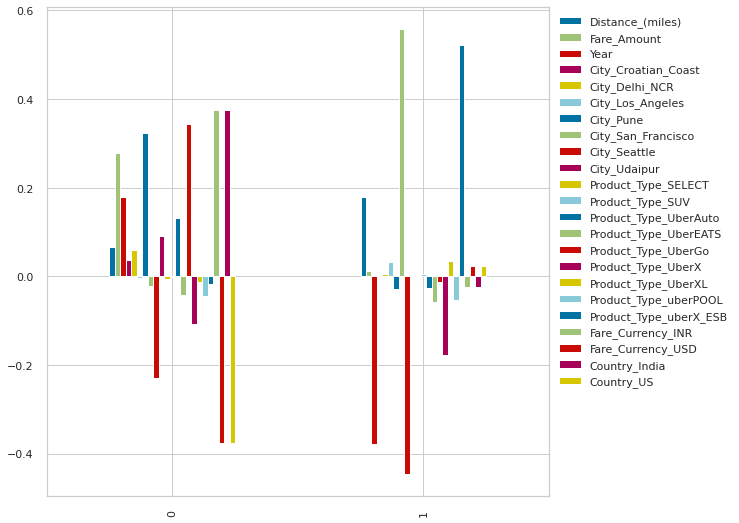

In [0]:
#Visualization of PCA 1 and PCA 2
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[:2]
 .plot.bar(figsize=(9,9))
 .legend(bbox_to_anchor=(1,1))
 )

* From the graph above it can be observed PCA1 is made up of Fare Amount, City Pune, UberGo, Currency INR and Country India.
* PCA 2 is made up of elements City_SanFrancisco, Product_Type_uberX_ESB

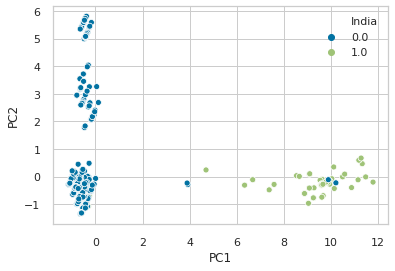

In [0]:
#Country mapping with respect to PC1 and PC2
sns.scatterplot(x='PC1', y='PC2',data=pca_X.assign(India=X.Country_India),
hue='India')

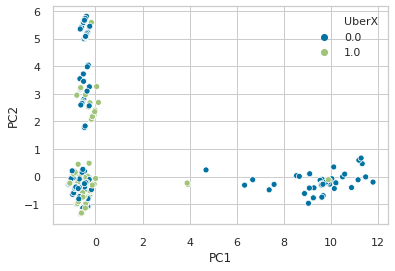

In [0]:
#Uber Go on PCA1
sns.scatterplot(x='PC1', y='PC2',data=pca_X.assign(UberX=X.Product_Type_UberX),
hue='UberX')

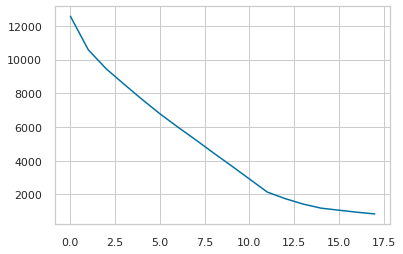

In [0]:
#Clustering
#Elbow Plot
inerts=[]
for i in range(2,20):
  k=cluster.KMeans(n_clusters=i,random_state=42)
  k.fit(X_std)
  inerts.append(k.inertia_)
pd.Series(inerts).plot()

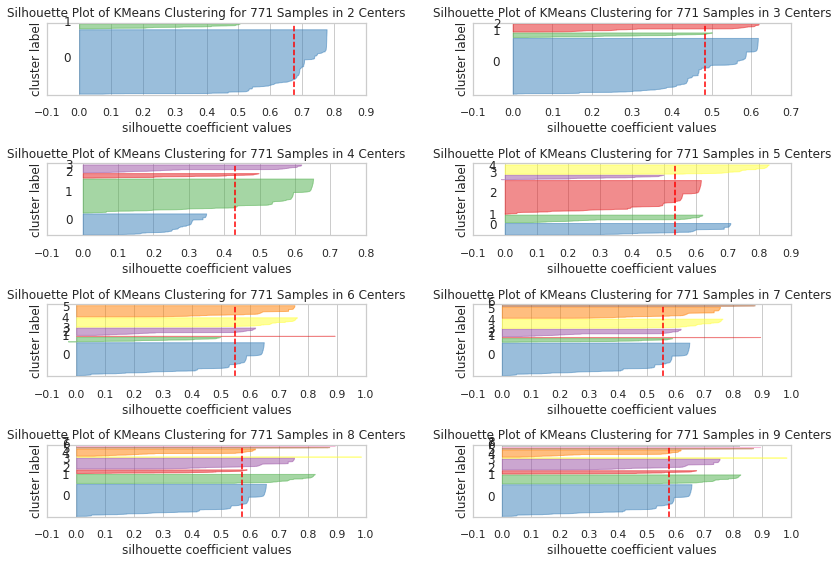

In [0]:
start, end = 2, 10
cols = 2
rows = ((end - start) // cols)
fix, axes = plt.subplots(rows, cols, figsize=(12,8))
axes = axes.reshape(cols * rows)
for i, k in enumerate(range(start, end), 0):
    ax = axes[i]
    sil = SilhouetteVisualizer(cluster.KMeans(n_clusters=k, random_state=42), ax=ax)
    sil.fit(X_std)
    sil.finalize()
plt.tight_layout()

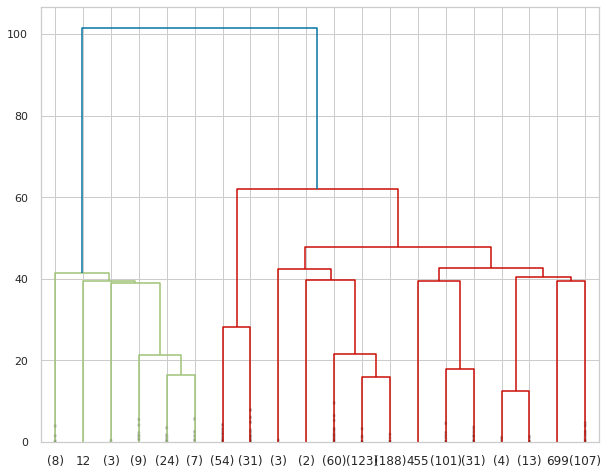

In [0]:
# Try another mechanism
fig, ax = plt.subplots(figsize=(10,8))
hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'),
                    truncate_mode='lastp', p=20, show_contracted=True)
pass  # here to hide return value of above

In [0]:
# From elbow plot, silhoutte coefficient values choose 2 clusters
k2= cluster.KMeans(n_clusters=2, random_state=42)
k2.fit(X_std)
labels = k2.predict(X_std)

In [0]:
#Mean and variance with respect to the two clusters
(X.assign(label=labels)
  .groupby('label')
  .agg(['mean', 'var'])
  .T
)

label                                  0             1
Distance_(miles)       mean     2.928679      4.602692
                       var     16.492800     20.766577
Fare_Amount            mean    10.469068    171.446731
                       var    166.308879  28168.900477
Year                   mean  2017.286509   2019.192308
                       var      0.956795      0.158371
City_Croatian_Coast    mean     0.004172      0.000000
                       var      0.004161      0.000000
City_Delhi_NCR         mean     0.000000      0.019231
                       var      0.000000      0.019231
City_Los_Angeles       mean     0.002782      0.000000
                       var      0.002778      0.000000
City_Pune              mean     0.000000      0.730769
                       var      0.000000      0.200603
City_San_Francisco     mean     0.123783      0.000000
                       var      0.108612      0.000000
City_Seattle           mean     0.869263      0.000000
                       var      0.113803      0.000000
City_Udaipur           mean     0.000000      0.057692
                       var      0.000000      0.055430
Product_Type_SELECT    mean     0.001391      0.000000
                       var      0.001391      0.000000
Product_Type_SUV       mean     0.001391      0.000000
                       var      0.001391      0.000000
Product_Type_UberAuto  mean     0.000000      0.153846
                       var      0.000000      0.132730
Product_Type_UberEATS  mean     0.151599      0.000000
                       var      0.128796      0.000000
Product_Type_UberGo    mean     0.000000      0.807692
                       var      0.000000      0.158371
Product_Type_UberX     mean     0.545202      0.000000
                       var      0.248302      0.000000
Product_Type_UberXL    mean     0.023644      0.000000
                       var      0.023117      0.000000
Product_Type_uberPOOL  mean     0.183588      0.038462
                       var      0.150092      0.037707
Product_Type_uberX_ESB mean     0.075104      0.000000
                       var      0.069560      0.000000
Fare_Currency_INR      mean     0.000000      1.000000
                       var      0.000000      0.000000
Fare_Currency_USD      mean     0.995828      0.000000
                       var      0.004161      0.000000
Country_India          mean     0.000000      1.000000
                       var      0.000000      0.000000
Country_US             mean     0.995828      0.000000
                       var      0.004161      0.000000

In [0]:
# Add coloring to aid impact to clusters
(X.assign(label=labels)
  .groupby('label')
  .mean()
  .T
 .style.background_gradient(cmap='RdBu', axis=1)
)

label,0,1
Distance_(miles),2.928679,4.602692
Fare_Amount,10.469068,171.446731
Year,2017.286509,2019.192308
City_Croatian_Coast,0.004172,0.000000
City_Delhi_NCR,0.000000,0.019231
City_Los_Angeles,0.002782,0.000000
City_Pune,0.000000,0.730769
City_San_Francisco,0.123783,0.000000
City_Seattle,0.869263,0.000000
City_Udaipur,0.000000,0.057692


* Cluster 0 - Country US, Currency USD, City Seattle, Product type Uber X
* Cluster 1 - Country India, Currency INR, City Pune, Product_Uber Go




####**Conclusion**
From the above analysis the following observations are made,

**Exploring Data**
* The data mostly is made of object values and few float and integer types
* The data has about 463 missing/Nan values spread across different columns, out of which 26% 'Begin Address' and 20% 'Dropoff Address' are missing
* Total successful rides are 685 while 76 were cancelled by me and 14 failed Uber end. The rate of failure at Uber end is pretty low   
* Maximum Rides were taken in the US, followed by India and very few in Croatia
* The longest distance travelled in a single ride was 23 miles
* USD,INR, HRK and EURO were the different currencies used to pay the fare
* The product type used most was Uber X followed by Pool

**Analysis with Plotting & Visualization techniques**
* From the bar plot It can be interpretted that maximum rides were taken in Seattle, followed by San Francisco and Pune
* From the Pie Plot,I can see that 35% of the rides were taken in the year 2017 and the usage has dropped to 13% in 2019 and 1.4% in 2020 which makes sense as I have my own car now 
* Referring to the donut plot, 92% of the rides were taken in the US vs 6% in India as I use other modes of travel here
* From the Histogram I can see most rides were completed successfully 
* From the bar chart I can see that I was more dependent on Uber in my Professional life than Student Life 
* From the Outlier in the box plot I observed a transaction of '700' which seemed unlikely but studying it further with the scatter plot I see that the transactions made in different currencies are clubbed together
* The Fare Amount is highly correlated with the coordinates of the Start Address. This indicates that the Fare Amount Increases based on the Start coordinates
* From the pivot table, it is observed that each ride on an average costed $9.9 in the US, Rs 168 in India and Kuna 126 in Croatia
* From the box plot, I see most miles were travelled in the Evening/Night time post work in comparison to the Day time
* From the violin plot it is observed maximum miles were driven in the US from 2015-2019.Few rides in Croatia in 2019.No rides in the US recorded 2020. 
* From the stacked bar plot I can see the Product type UberX and Uber Pool was more popular and easily availbe in Seattle US, where as UberGo and UberAuto was more popular in India

**Machine Learning**
* The data cleaning involved dropping some non essential values like status,Request time,dropoff time etc. Also all the missing values are dropped and the essential categorial data is converted to numeric 
* On plotting the PCA component 1 & 2 it is seen that PCA1 is made of the elements: - Fare Amount, City Pune, Product Uber Go, Currency INR,Country India.
PCA2 is made up of elements City San Francisco and Product UberX_ESB
* From the scatter plots of PC1 against PC2 we can see element India prominently on PC1. Similarly on the second scatter plot the product UberX is prominent on PC2 as this product is widely used in the US and less in India

**Clustering**  
* The elbow plot has 2 bends, one at ~2 and the other at ~11 approximately. I was not sure which would be the correct one to choose but on plotting the Silhouette plot of Kmeans the coeffient value is highest with two centers. Also the dendrogram suggests two clusters
* With the color graded table I can interpret the two clusters as follows 


> 


    Cluster 0 - Country US, Currency USD, City Seattle, Product type Uber

> 


    Cluster 1 - Country India, Currency INR, City Pune, Product_Uber Go


**Thank you** :)



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmu3ptiq6zAEq-o5z5C1Ao1syjlnv3akRXB6n9scEjLIERl-6svg&s"/>                                                                     

<font size="1">Image Source: clipart.email</font>